In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.datasets import mnist

## Data exploration and preprocessing

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
y_train.shape, y_test.shape

((60000,), (10000,))

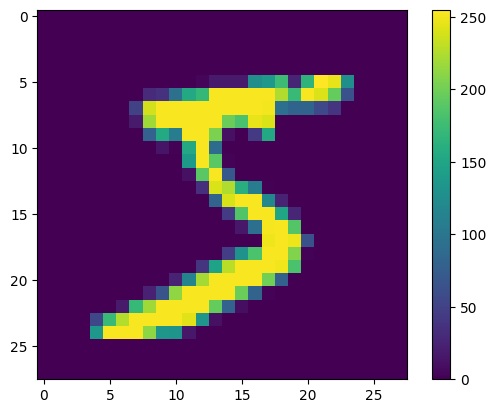

In [24]:
plt.imshow(X_train[0])
plt.colorbar()

In [25]:
X_train.max(), X_train.min()

(255, 0)

In [26]:
y_train.max(), y_train.min()

(9, 0)

In [27]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [28]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [29]:
X_test.max(), X_test.min()

(1.0, 0.0)

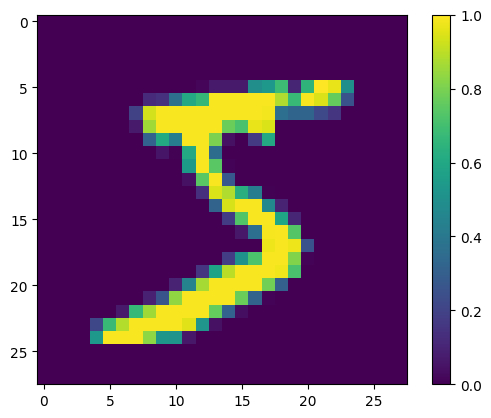

In [32]:
plt.imshow(X_train[0])
plt.colorbar()

In [31]:
y_train[0]

5

## Buliding the LSTM

In [33]:
X_train.shape

(60000, 28, 28)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.LSTM(units= 128, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units= 128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,426 (845.41 KB)

 Trainable params: 216,426 (845.41 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.5996 - loss: 1.1557 - val_accuracy: 0.9598 - val_loss: 0.1404
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9516 - loss: 0.1825 - val_accuracy: 0.9678 - val_loss: 0.1074
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9685 - loss: 0.1218 - val_accuracy: 0.9763 - val_loss: 0.0886
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9770 - loss: 0.0875 - val_accuracy: 0.9826 - val_loss: 0.0663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9807 - loss: 0.0712 - val_accuracy: 0.9831 - val_loss: 0.0541
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9821 - loss: 0.0666 - val_accuracy: 0.9855 - val_loss: 0.0477
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9862 - loss: 0.0519 - val_accuracy: 0.9860 - val_loss: 0.0479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9880 -

In [43]:
y_pred = np.argmax(model.predict(X_test),axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [44]:
y_pred[0], y_test[0]

(7, 7)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
confusion_matrix(y_test, y_pred)

array([[ 973,    0,    0,    0,    0,    0,    3,    1,    3,    0],
       [   0, 1128,    3,    1,    1,    0,    0,    1,    1,    0],
       [   1,    0, 1026,    1,    0,    0,    0,    3,    1,    0],
       [   0,    0,    3,  995,    0,    9,    0,    0,    2,    1],
       [   2,    0,    2,    0,  952,    0,    3,    3,    2,   18],
       [   0,    0,    0,    3,    0,  880,    4,    0,    5,    0],
       [   1,    3,    0,    0,    1,    1,  942,    0,   10,    0],
       [   0,    2,   10,    1,    0,    0,    0, 1009,    1,    5],
       [   1,    0,    2,    0,    0,    1,    0,    0,  968,    2],
       [   1,    0,    0,    0,    2,    4,    0,    2,    3,  997]],
      dtype=int64)

In [48]:
accuracy_score(y_test, y_pred)

0.987

In [49]:
def learning_curve(history, epoch):

    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()

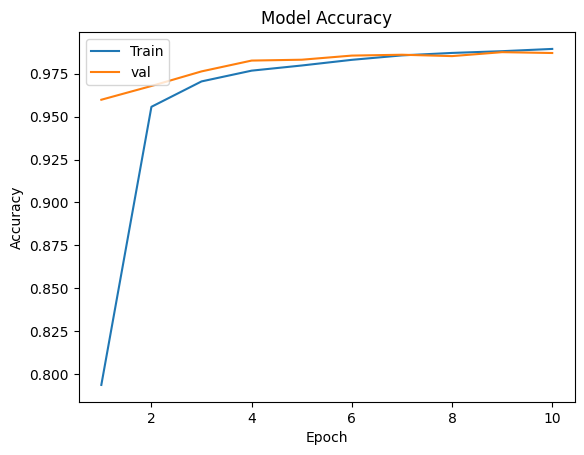

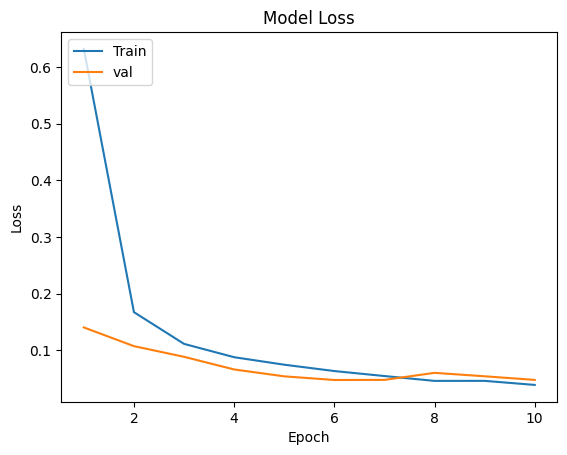

In [50]:
learning_curve(history, 10)